## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
py_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
py_data.head()


# Display the data table for preview

#Where do I put the removal of duplicates???


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
len(py_data["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_pydata = py_data.loc[py_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_pydata

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

df = dup_pydata(py_data, columns = ['Mouse ID'])
df_duplicates_removed = DataFrame.drop_duplicates(df)
print(df_duplicates_removed)


TypeError: 'numpy.ndarray' object is not callable

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#found .isin in stack overflow. This is the bomb!
new_py = py_data[py_data['Mouse ID'].isin(dup_pydata) == False]
new_py

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(new_py["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_series = new_py.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_series
median_series = new_py.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_series
var_series = new_py.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
var_series
std_series = new_py.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_series
sem_series = new_py.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_series

summary_tumor_df = pd.DataFrame({"mean": mean_series,
                                 "median": median_series,
                                 "var":var_series,
                                 "Standard Dev": std_series,
                                 "SEM": sem_series
                           })
summary_tumor_df

,mean,median,var,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
agg_new_py = new_py.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_new_py



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

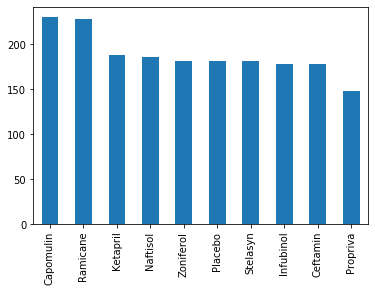

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = new_py["Drug Regimen"].value_counts()
mice_count.plot(kind="bar")
plt.show()

#y axis and title

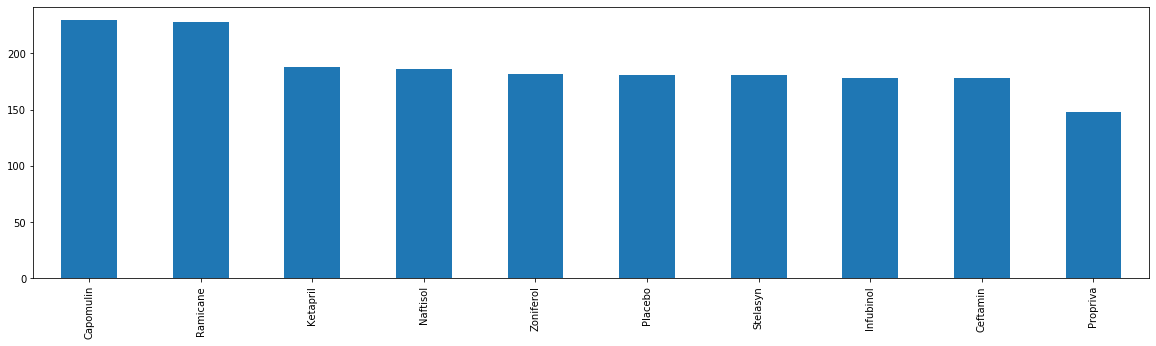

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_count = new_py["Drug Regimen"].value_counts()
mice_count.plot(kind="bar", figsize=(20,5))

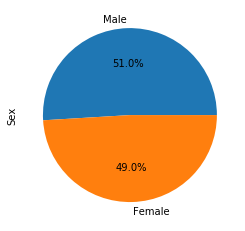

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = new_py["Sex"].value_counts()
mice_count.plot(kind="pie", autopct = "%1.1f%%")
plt.show()

#Title and % of value

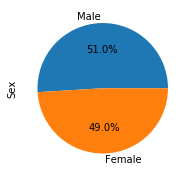

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_count.plot(kind="pie", figsize=(20,3), autopct = "%1.1f%%")



## Quartiles, Outliers and Boxplots

Lower Capomulin Quartile: 32.37735684
Upper Capomulin Quartile: 40.1592203
Interquartile Capomulin range: 7.781863460000004
The Capomulin median: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values below 28.486425109999995 could be outliers.
Lower Ramicane Quartile: 31.56046955
Upper Ramicane Quartile: 40.65900627
Interquartile Ramicane range: 9.098536719999998
The Ramicane median: 36.56165229
Values below 17.912664470000003 could be outliers.
Values below 27.01120119 could be outliers.
Lower Infubinol Quartile: 54.04860769
Upper Infubinol Quartile: 65.52574285
Interquartile Infubinol range: 11.477135160000003
The Infubinol median: 60.16518046
Values below 36.83290494999999 could be outliers.
Values below 48.310040109999996 could be outliers.
Lower Ceftamin Quartile: 48.72207785
Upper Ceftamin Quartile: 64.29983003
Interquartile Ceftamin range: 15.577752179999997
The Ceftamin median: 59.85195552
Values below 25.355449580000002 could be outliers.
Values below 40.

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

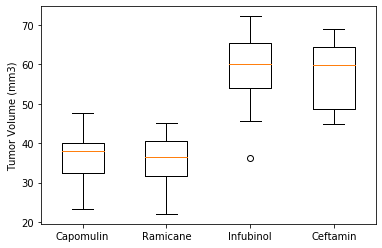

In [17]:

## Quartiles, Outliers and Boxplots

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_tumor = new_py.groupby(["Mouse ID"])["Timepoint"].max()
#final_tumor.reset_index()
#merged_data = final_tumor.merge(new_py, on=["Mouse ID", "Timepoint"], how="left")


bplot_capomulin = new_py.loc[new_py["Drug Regimen"]== "Capomulin"] 
bplot_capomulin_time = bplot_capomulin.groupby(["Mouse ID"])["Timepoint"].max()
bplot_capomulin_tumor = bplot_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
bplot_capomulin_merge = pd.merge(bplot_capomulin_time, bplot_capomulin_tumor, how="left", on=["Mouse ID"])
#print(bplot_capomulin_merge)
#bplot_capomulin = new_py.loc[new_py["Drug Regimen"]== "Capomulin"] 
#bplot_capomulin = bplot_capomulin.loc[bplot_capomulin["Timepoint"]==45]
#bplot_capomulin = bplot_capomulin["Tumor Volume (mm3)"]
#print(bplot_capomulin)
#bplot_ramicane = new_py.loc[new_py["Drug Regimen"]== "Ramicane"] 
#bplot_ramicane = bplot_ramicane.loc[bplot_ramicane["Timepoint"]==45]
#bplot_ramicane = bplot_ramicane["Tumor Volume (mm3)"]
bplot_ramicane = new_py.loc[new_py["Drug Regimen"]== "Ramicane"] 
bplot_ramicane_time = bplot_ramicane.groupby(["Mouse ID"])["Timepoint"].max()
bplot_ramicane_tumor = bplot_ramicane.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
bplot_ramicane_merge = pd.merge(bplot_ramicane_time, bplot_ramicane_tumor, how="left", on=["Mouse ID"])

#bplot_infubinol = new_py.loc[new_py["Drug Regimen"]== "Infubinol"] 
#bplot_infubinol = bplot_infubinol.loc[bplot_infubinol["Timepoint"]==45]
#bplot_infubinol = bplot_infubinol["Tumor Volume (mm3)"]
bplot_infubinol = new_py.loc[new_py["Drug Regimen"]== "Infubinol"] 
bplot_infubinol_time = bplot_infubinol.groupby(["Mouse ID"])["Timepoint"].max()
bplot_infubinol_tumor = bplot_infubinol.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
bplot_infubinol_merge = pd.merge(bplot_infubinol_time, bplot_infubinol_tumor, how="left", on=["Mouse ID"])

#bplot_ceftamin = new_py.loc[new_py["Drug Regimen"]== "Ceftamin"] 
#bplot_ceftamin = bplot_ceftamin.loc[bplot_ceftamin["Timepoint"]==45]
#bplot_ceftamin = bplot_ceftamin["Tumor Volume (mm3)"]
bplot_ceftamin = new_py.loc[new_py["Drug Regimen"]== "Ceftamin"] 
bplot_ceftamin_time = bplot_ceftamin.groupby(["Mouse ID"])["Timepoint"].max()
bplot_ceftamin_tumor = bplot_ceftamin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
bplot_ceftamin_merge = pd.merge(bplot_ceftamin_time, bplot_ceftamin_tumor, how="left", on=["Mouse ID"])

#✓ The notebook calculates all of the following for all four drug regimens:
#✓ Quartiles


#quartiles capomulin
quar_capomulin = bplot_capomulin_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq_capomulin = quar_capomulin[0.25]
upperq_capomulin = quar_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

print(f"Lower Capomulin Quartile: {lowerq_capomulin}")
print(f"Upper Capomulin Quartile: {upperq_capomulin}")
print(f"Interquartile Capomulin range: {iqr_capomulin}")
print(f"The Capomulin median: {quar_capomulin[.5]}")

lowerbound_capomulin = lowerq_capomulin -(1.5*iqr_capomulin)
upperbound_capomulin = upperq_capomulin -(1.5*iqr_capomulin)
print(f"Values below {lowerbound_capomulin} could be outliers.")
print(f"Values below {upperbound_capomulin} could be outliers.")

#✓ IQR
#✓ Outlier boundaries
#✓ All potential outliers


#bplot_capomulin.plot(kind="box")

#quartiles ramicane
quar_ramicane = bplot_ramicane_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ramicane = quar_ramicane[0.25]
upperq_ramicane = quar_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

print(f"Lower Ramicane Quartile: {lowerq_ramicane}")
print(f"Upper Ramicane Quartile: {upperq_ramicane}")
print(f"Interquartile Ramicane range: {iqr_ramicane}")
print(f"The Ramicane median: {quar_ramicane[.5]}")

lowerbound_ramicane = lowerq_ramicane -(1.5*iqr_ramicane)
upperbound_ramicane = upperq_ramicane -(1.5*iqr_ramicane)
print(f"Values below {lowerbound_ramicane} could be outliers.")
print(f"Values below {upperbound_ramicane} could be outliers.")

#quartiles infubinol
quar_infubinol = bplot_infubinol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infubinol = quar_infubinol[0.25]
upperq_infubinol = quar_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

print(f"Lower Infubinol Quartile: {lowerq_infubinol}")
print(f"Upper Infubinol Quartile: {upperq_infubinol}")
print(f"Interquartile Infubinol range: {iqr_infubinol}")
print(f"The Infubinol median: {quar_infubinol[.5]}")

lowerbound_infubinol = lowerq_infubinol -(1.5*iqr_infubinol)
upperbound_infubinol = upperq_infubinol -(1.5*iqr_infubinol)
print(f"Values below {lowerbound_infubinol} could be outliers.")
print(f"Values below {upperbound_infubinol} could be outliers.")

#quartiles ceftamin
quar_ceftamin = bplot_ceftamin_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceftamin = quar_ceftamin[0.25]
upperq_ceftamin = quar_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

print(f"Lower Ceftamin Quartile: {lowerq_ceftamin}")
print(f"Upper Ceftamin Quartile: {upperq_ceftamin}")
print(f"Interquartile Ceftamin range: {iqr_ceftamin}")
print(f"The Ceftamin median: {quar_ceftamin[.5]}")

lowerbound_ceftamin = lowerq_ceftamin -(1.5*iqr_ceftamin)
upperbound_ceftamin = upperq_ceftamin -(1.5*iqr_ceftamin)
print(f"Values below {lowerbound_ceftamin} could be outliers.")
print(f"Values below {upperbound_ceftamin} could be outliers.")

#final_tumor = new_py.groupby(["Mouse ID"])["Timepoint"].max()
#final_tumor.reset_index()
#merged_data = final_tumor.merge(new_py, on=["Mouse ID", "Timepoint"], how="left")
#print (merged_data.head)
#✓ IQR
#✓ Outlier boundaries
#✓#All potential outliers

#capomulin_plot = bplot_capomulin.boxplot(bplot_capomulin, vert=True, patch_artist=True)
#✓A box and whisker plot is successfully generated for the final tumor volume, and meets all of the following criteria:
#✓ All four treatment regimens are on the same plot
#✓ Potential outlier data points have a custom style or color

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
      # Determine outliers using upper and lower bounds
        # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#bplot_capomulin.plot(kind="box")
#bplot_ramicane.plot(kind="box")
#bplot_infubinol.plot(kind="box")
#bplot_ceftamin.plot(kind="box") 

fig1, ax = plt.subplots()
ax.boxplot(bplot_capomulin_merge["Tumor Volume (mm3)"], positions = [1], widths = .5)
ax.boxplot(bplot_ramicane_merge["Tumor Volume (mm3)"], positions = [2], widths = .5)
ax.boxplot(bplot_infubinol_merge["Tumor Volume (mm3)"], positions = [3], widths = .5)
ax.boxplot(bplot_ceftamin_merge["Tumor Volume (mm3)"], positions = [4], widths = .5)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

Text(0.5, 1.0, 'Poor Tumor b128')

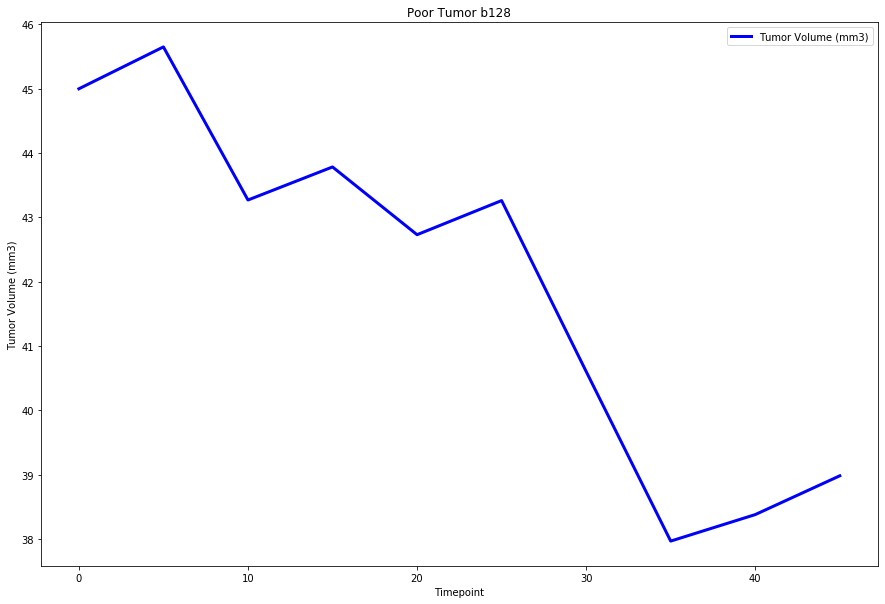

In [24]:
# Generate a line plot of time point versus tumor volume for ***a mouse*** (ONE MOUSE) treated with Capomulin
# Title with which mouse 
#B128 Mouse ID
capomulin_mouse = new_py.loc[new_py["Drug Regimen"]=="Capomulin"]
#capomulin_mouse = capomulin_mouse.reset_index()
#capomulin_mouse.head()

one_mouse = capomulin_mouse.loc[capomulin_mouse["Mouse ID"]=="b128"]
one_mouse.head(15)

one_mouse = one_mouse.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

one_mouse.set_index('Timepoint').plot(figsize=(15,10), linewidth=3.0, color='blue')

#plt.plot(capomulin_mouse,TimePoint, color='blue', label="Tumor Tracker")
#plt.legend(loc="best")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Poor Tumor b128")

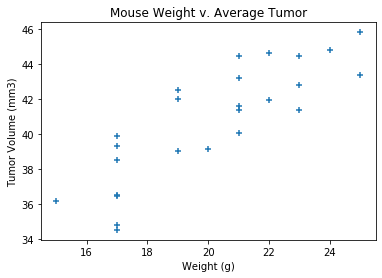

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# some severe googlefu on matplotlib and the bonus on Lesson 3 matplotlib summary_stats

scatter_capomulin = new_py.loc[new_py["Drug Regimen"]== "Capomulin"]
scatter_capomulin
#bplot_capomulin_time = bplot_capomulin.groupby(["Mouse ID"])["Timepoint"].max()
#scatter_capomulin = new_py.groupby[new_py["Drug Regimen"]== "Capomulin"]
#scatter_capomulin

cap_mouse_wt = scatter_capomulin.groupby(["Mouse ID"])['Weight (g)'].mean()
cap_mouse_wt

tumor_per_mouse = scatter_capomulin.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
tumor_per_mouse

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight v. Average Tumor")
plt.scatter(cap_mouse_wt, tumor_per_mouse, marker = "+")
plt.show()





## Correlation and Regression

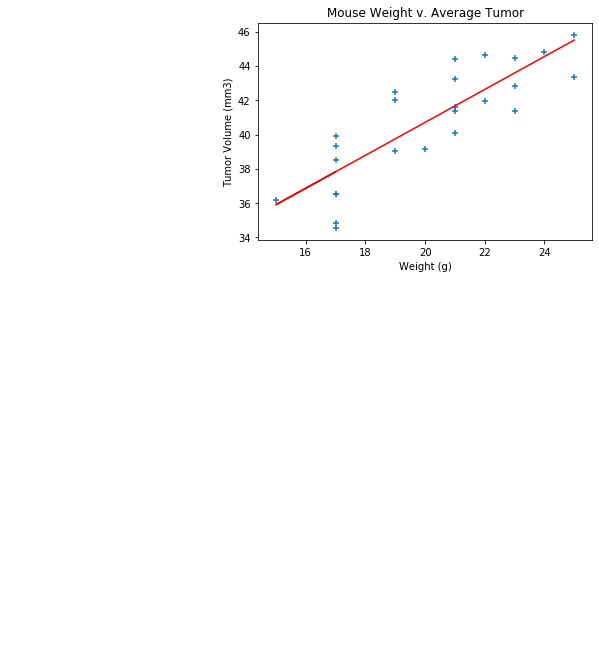

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_capomulin = new_py.loc[new_py["Drug Regimen"]== "Capomulin"]
scatter_capomulin
#bplot_capomulin_time = bplot_capomulin.groupby(["Mouse ID"])["Timepoint"].max()
#scatter_capomulin = new_py.groupby[new_py["Drug Regimen"]== "Capomulin"]
#scatter_capomulin

cap_mouse_wt = scatter_capomulin.groupby(["Mouse ID"])['Weight (g)'].mean()
cap_mouse_wt

tumor_per_mouse = scatter_capomulin.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
tumor_per_mouse

x_values = scatter_capomulin['Weight (g)']
y_values = scatter_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight v. Average Tumor")
plt.scatter(cap_mouse_wt, tumor_per_mouse, marker = "+")
plt.show()

In [ ]:
#Observations
#1. The heavier the mouse is the larger the tumor size. 
#This is visualized by the correlation with regression line. 
#2. The placebo has no effect on the tumor. Each tumor that was treated with the placebo did not decrease in any facet. 
#3. This study was unbiased and fair. With as many male to female ratio. The weight size is in a 15 gram difference. 
#4. Each medicine has it's own effectiveness.
#Capomulin and Ramicane are the prime choices to continue the study because of its effectiveness of decreasing the size of the tumor. 
#The box plot visualizes this in a degree of quartiles. 
#Would recommend to continue futher studies with the effectiveness of these two drugs. 
#Although Capomulin and Ramicane are the top two used drugs in this series of tests its effectivess to decress tumor size merits its own study. 